In [354]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import os

In [173]:
os.getcwd()

'/Users/chloebergsma-safar/Desktop/Metis/NBM_Classification_Project'

# Read in Housing Maintenance Code Violations

Violations come out of inspections. Most inspections are complaint-based.

Inspectors will inspect the complaint issue but also always inspect for 6 other conditions:

    1. smoke detectors
    2. carbon monoxide detectors
    3. lead-based paint (if there's a child under 6)
    4. window guards (if there's a child under 11)
    5. double cylinder locks
    6. bars on the fire escape windows
    
An inspection may result in a violation for the original complaint issue but it may not, and could result
in one or more violations of the routin 6 conditions inspected.

In [189]:
# this Housing Maintenance Code Violations dataset uses the following filter: OrderNumber is 616 OR 617 (lead-based paint)
violations = pd.read_csv('Housing_Maintenance_Code_Violations_lead.csv')

In [227]:
violations.shape

(170281, 41)

In [228]:
violations.iloc[:,10:20]

,Postcode,Apartment,Story,Block,Lot,Class,InspectionDate,ApprovedDate,OriginalCertifyByDate,OriginalCorrectByDate
0,10451.0,31F,5,2482,1,C,10/08/2013,10/09/2013,11/12/2013,11/07/2013
1,10457.0,3A,3,2825,10,C,10/09/2013,10/17/2013,11/20/2013,11/15/2013
2,10457.0,3A,3,2825,10,C,10/09/2013,10/17/2013,11/20/2013,11/15/2013
3,10466.0,2F,2,4840,57,C,11/20/2013,12/03/2013,01/06/2014,01/01/2014
4,11358.0,2C,2,5331,8,C,10/19/2013,10/26/2013,11/30/2013,11/25/2013
...,...,...,...,...,...,...,...,...,...,...
170276,11226.0,A2,1,5221,86,C,12/14/2021,12/17/2021,01/18/2022,01/13/2022
170277,11226.0,A2,1,5221,86,C,12/14/2021,12/17/2021,01/18/2022,01/13/2022
170278,10458.0,B,1,3309,25,C,10/18/2006,10/19/2006,11/20/2006,11/15/2006
170279,10458.0,B,1,3309,25,C,10/18/2006,10/19/2006,11/20/2006,11/15/2006


In [229]:
violations.columns

Index(['ViolationID', 'BuildingID', 'RegistrationID', 'BoroID', 'Borough',
       'HouseNumber', 'LowHouseNumber', 'HighHouseNumber', 'StreetName',
       'StreetCode', 'Postcode', 'Apartment', 'Story', 'Block', 'Lot', 'Class',
       'InspectionDate', 'ApprovedDate', 'OriginalCertifyByDate',
       'OriginalCorrectByDate', 'NewCertifyByDate', 'NewCorrectByDate',
       'CertifiedDate', 'OrderNumber', 'NOVID', 'NOVDescription',
       'NOVIssuedDate', 'CurrentStatusID', 'CurrentStatus',
       'CurrentStatusDate', 'NovType', 'ViolationStatus', 'RentImpairing',
       'Latitude', 'Longitude', 'CommunityBoard', 'CouncilDistrict',
       'CensusTract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [247]:
# look at values in ViolationStatus column

violations['ViolationStatus'].value_counts()

Close    123946
Open      46335
Name: ViolationStatus, dtype: int64

In [308]:
# drop columns not needed

violations_rev = violations.drop(['RegistrationID', 'HouseNumber', 'LowHouseNumber', 'HighHouseNumber',
                                 'StreetName', 'StreetCode', 'Apartment', 'OrderNumber', 'NOVID', 'NOVDescription',
                                  'NOVIssuedDate', 'CurrentStatusID', 'NovType','CouncilDistrict', 'NTA'], axis=1)

In [309]:
violations_rev.columns

Index(['ViolationID', 'BuildingID', 'BoroID', 'Borough', 'Postcode', 'Story',
       'Block', 'Lot', 'Class', 'InspectionDate', 'ApprovedDate',
       'OriginalCertifyByDate', 'OriginalCorrectByDate', 'NewCertifyByDate',
       'NewCorrectByDate', 'CertifiedDate', 'CurrentStatus',
       'CurrentStatusDate', 'ViolationStatus', 'RentImpairing', 'Latitude',
       'Longitude', 'CommunityBoard', 'CensusTract', 'BIN', 'BBL'],
      dtype='object')

In [310]:
violations_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170281 entries, 0 to 170280
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ViolationID            170281 non-null  int64  
 1   BuildingID             170281 non-null  int64  
 2   BoroID                 170281 non-null  int64  
 3   Borough                170281 non-null  object 
 4   Postcode               170280 non-null  float64
 5   Story                  170207 non-null  object 
 6   Block                  170281 non-null  int64  
 7   Lot                    170281 non-null  int64  
 8   Class                  170281 non-null  object 
 9   InspectionDate         170281 non-null  object 
 10  ApprovedDate           170281 non-null  object 
 11  OriginalCertifyByDate  170011 non-null  object 
 12  OriginalCorrectByDate  170011 non-null  object 
 13  NewCertifyByDate       44010 non-null   object 
 14  NewCorrectByDate       44010 non-nul

In [311]:
# convert date columns to datetime

date_cols = ['InspectionDate', 'ApprovedDate', 'OriginalCertifyByDate', 'OriginalCorrectByDate', 'NewCertifyByDate',
'NewCorrectByDate', 'CertifiedDate', 'CurrentStatusDate']

violations_rev[date_cols] = violations_rev[date_cols].apply(pd.to_datetime)

In [312]:
# drop rows with null values in 'OriginalCertifyByDate' column

violations_rev.dropna(subset=['OriginalCertifyByDate'], inplace=True)

In [313]:
# create a CertifyByDate column that assigns values from OriginalCertifyByDate or NewCertifyByDate

def program(violations_rev):
    if pd.isnull(violations_rev['NewCertifyByDate']) :
        return violations_rev['OriginalCertifyByDate']
    else :
        return violations_rev['NewCertifyByDate']

violations_rev['CertifyByDate'] = violations_rev.apply(program, axis=1)

In [315]:
violations_rev.shape

(170011, 27)

In [316]:
# create new column that calculates the # of days between CertifyByDate and CurrentStatus

violations_rev['Status_from_Certify'] = violations_rev['CurrentStatusDate'] - violations_rev['CertifyByDate']

In [317]:
# create df filtered to closed violations whose current status is not 'VIOLATION WILL BE REINSPECTED'

violations_closed = violations_rev[(violations_rev.ViolationStatus == 'Close') & 
                                   (violations_rev.CurrentStatus != 'VIOLATION WILL BE REINSPECTED')]

In [318]:
violations_closed.shape

(123400, 28)

In [319]:
violations_closed.iloc[:,9:].sort_values(by='Status_from_Certify')

,InspectionDate,ApprovedDate,OriginalCertifyByDate,OriginalCorrectByDate,NewCertifyByDate,NewCorrectByDate,CertifiedDate,CurrentStatus,CurrentStatusDate,ViolationStatus,RentImpairing,Latitude,Longitude,CommunityBoard,CensusTract,BIN,BBL,CertifyByDate,Status_from_Certify
66320,2016-03-23,2016-03-24,2016-04-27,2016-04-22,2016-10-27,2016-10-22,NaT,VIOLATION CLOSED,2016-06-27,Close,N,40.845609,-73.897569,6.0,395.0,2009599.0,2.029240e+09,2016-10-27,-122 days
13024,2015-07-06,2015-07-11,2015-08-15,2015-08-10,2015-08-29,2015-08-24,NaT,VIOLATION CLOSED,2015-07-16,Close,N,40.644656,-73.961897,14.0,512.0,3117599.0,3.051220e+09,2015-08-29,-44 days
13025,2015-07-06,2015-07-11,2015-08-15,2015-08-10,2015-08-29,2015-08-24,NaT,VIOLATION CLOSED,2015-07-16,Close,N,40.644656,-73.961897,14.0,512.0,3117599.0,3.051220e+09,2015-08-29,-44 days
13026,2015-07-06,2015-07-11,2015-08-15,2015-08-10,2015-08-29,2015-08-24,NaT,VIOLATION CLOSED,2015-07-16,Close,N,40.644656,-73.961897,14.0,512.0,3117599.0,3.051220e+09,2015-08-29,-44 days
13027,2015-07-06,2015-07-11,2015-08-15,2015-08-10,2015-08-29,2015-08-24,NaT,VIOLATION CLOSED,2015-07-16,Close,N,40.644656,-73.961897,14.0,512.0,3117599.0,3.051220e+09,2015-08-29,-44 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147605,2005-02-01,2005-02-03,2005-03-07,2005-03-02,NaT,NaT,NaT,VIOLATION CLOSED,2022-02-03,Close,N,40.647282,-73.960198,14.0,51002.0,3117149.0,3.051010e+09,2005-03-07,6177 days
170013,2005-02-01,2005-02-03,2005-03-07,2005-03-02,NaT,NaT,NaT,VIOLATION CLOSED,2022-02-03,Close,N,40.647282,-73.960198,14.0,51002.0,3117149.0,3.051010e+09,2005-03-07,6177 days
145853,2004-12-02,2004-12-08,2005-01-09,2005-01-04,NaT,NaT,NaT,VIOLATION CLOSED,2022-01-06,Close,N,40.865932,-73.919610,12.0,293.0,1064785.0,1.022230e+09,2005-01-09,6206 days
167362,2004-09-08,2004-09-11,2004-10-14,2004-10-09,2004-11-11,2004-11-06,2004-11-15,VIOLATION CLOSED,2021-12-20,Close,N,40.856980,-73.930585,12.0,279.0,1084207.0,1.021700e+09,2004-11-11,6248 days


In [320]:
# create a column that calculates # of days between OriginalCertifyByDate and CurrentStatusDate
    # or InspectionDate)

def days_to_close(violations_closed):
    if violations_closed['Status_from_Certify'] < pd.Timedelta(0, unit='d'):
        return violations_closed['CurrentStatusDate'] - violations_closed['OriginalCertifyByDate']
    else:
        return violations_closed['Status_from_Certify']

violations_closed['Days_to_close'] = violations_closed.apply(days_to_close, axis=1)

<ipython-input-320-169434d59ff8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violations_closed['Days_to_close'] = violations_closed.apply(days_to_close, axis=1)


In [322]:
violations_closed.iloc[:,9:].sort_values(by='Days_to_close').head()

,InspectionDate,ApprovedDate,OriginalCertifyByDate,OriginalCorrectByDate,NewCertifyByDate,NewCorrectByDate,CertifiedDate,CurrentStatus,CurrentStatusDate,ViolationStatus,RentImpairing,Latitude,Longitude,CommunityBoard,CensusTract,BIN,BBL,CertifyByDate,Status_from_Certify,Days_to_close
32907,2018-11-23,2018-11-23,2018-12-29,2018-12-24,NaT,NaT,NaT,VIOLATION CLOSED,2018-11-26,Close,N,40.714880,-73.774575,8.0,472.0,4213409.0,4.099600e+09,2018-12-29,-33 days,-33 days
24759,2017-07-28,2017-07-28,2017-09-02,2017-08-28,NaT,NaT,NaT,VIOLATION CLOSED,2017-07-31,Close,N,40.828884,-73.937469,10.0,236.0,1060634.0,1.020400e+09,2017-09-02,-33 days,-33 days
24760,2017-07-28,2017-07-28,2017-09-02,2017-08-28,NaT,NaT,NaT,VIOLATION CLOSED,2017-07-31,Close,N,40.828884,-73.937469,10.0,236.0,1060634.0,1.020400e+09,2017-09-02,-33 days,-33 days
167032,2018-12-14,2019-03-05,2019-04-08,2019-04-03,NaT,NaT,NaT,VIOLATION CLOSED,2019-03-06,Close,N,40.865693,-73.901913,7.0,265.0,2014667.0,2.032140e+09,2019-04-08,-33 days,-33 days
22575,2017-03-25,2017-03-30,2017-05-02,2017-04-27,NaT,NaT,NaT,VIOLATION CLOSED,2017-03-30,Close,N,40.893809,-73.858700,12.0,420.0,2063299.0,2.048350e+09,2017-05-02,-33 days,-33 days


<AxesSubplot:>

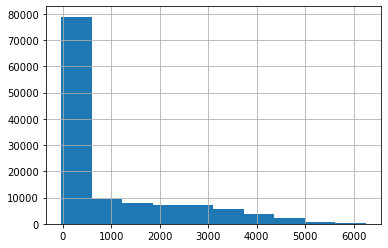

In [328]:
# look at histogram of column representing # of days between (OriginalCertifyByDate or NewCertifyByDate) and 
    # CurrentStatusDate columns

violations_closed['Days_to_close'].dt.days.hist()

In [329]:
# summary statistics of Days_to_close column

violations_closed['Days_to_close'].describe()

count                          123400
mean      911 days 18:38:23.533225264
std      1338 days 09:11:56.411173600
min                -33 days +00:00:00
25%                   8 days 00:00:00
50%                 111 days 00:00:00
75%                1537 days 00:00:00
max                6248 days 00:00:00
Name: Days_to_close, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x7f956b7f45b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f956b7f4c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f956b7f4160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f956b7e93a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f956b7e9730>],
 'means': []}

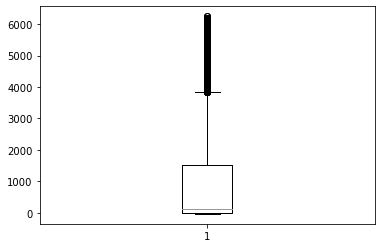

In [333]:
# look at box and whiskers plot of Days_to_close column

plt.boxplot(violations_closed['Days_to_close'].dt.days)

In [339]:
# find outliers in Days_to_close

# First quartile (Q1)
Q1 = np.percentile(violations_closed['Days_to_close'].dt.days, 25, interpolation = 'midpoint')

# Third quartile (Q3)
Q3 = np.percentile(violations_closed['Days_to_close'].dt.days, 75, interpolation = 'midpoint')

# Interquaritle range (IQR)
IQR = Q3 - Q1

# outliers more than 1.5 times the IQR below Q1
outliers_below = Q1 - 1.5 * IQR 

# outliers more than 1.5 times the IQR above Q3
outliers_above = Q3 + 1.5 * IQR

In [344]:
print(outliers_below)
print(outliers_above)

-2285.5
3830.5


In [347]:
# create df that removes outliers

violations_closed_no_outs = violations_closed[(violations_closed['Days_to_close'].dt.days >= -2285.5) & 
                                              (violations_closed['Days_to_close'].dt.days <= 3830.5)]

In [348]:
violations_closed_no_outs.shape

(117219, 29)

In [350]:
violations_closed_no_outs.iloc[:,9:].head()

,InspectionDate,ApprovedDate,OriginalCertifyByDate,OriginalCorrectByDate,NewCertifyByDate,NewCorrectByDate,CertifiedDate,CurrentStatus,CurrentStatusDate,ViolationStatus,RentImpairing,Latitude,Longitude,CommunityBoard,CensusTract,BIN,BBL,CertifyByDate,Status_from_Certify,Days_to_close
0,2013-10-08,2013-10-09,2013-11-12,2013-11-07,NaT,NaT,NaT,VIOLATION CLOSED,2020-08-26,Close,N,40.823932,-73.928033,4.0,63.0,2002968.0,2.024820e+09,2013-11-12,2479 days,2479 days
1,2013-10-09,2013-10-17,2013-11-20,2013-11-15,2013-12-04,2013-11-29,NaT,VIOLATION CLOSED,2017-08-03,Close,N,40.845765,-73.910292,5.0,22901.0,2007875.0,2.028250e+09,2013-12-04,1338 days,1338 days
2,2013-10-09,2013-10-17,2013-11-20,2013-11-15,2013-12-04,2013-11-29,NaT,VIOLATION CLOSED,2017-08-03,Close,N,40.845765,-73.910292,5.0,22901.0,2007875.0,2.028250e+09,2013-12-04,1338 days,1338 days
3,2013-11-20,2013-12-03,2014-01-06,2014-01-01,NaT,NaT,NaT,VIOLATION CLOSED,2021-04-11,Close,N,40.888973,-73.858927,12.0,406.0,2063481.0,2.048400e+09,2014-01-06,2652 days,2652 days
4,2013-10-19,2013-10-26,2013-11-30,2013-11-25,NaT,NaT,NaT,VIOLATION CLOSED,2013-12-23,Close,N,40.760940,-73.807524,7.0,1171.0,4120371.0,4.053310e+09,2013-11-30,23 days,23 days


In [357]:
med_days = np.median(violations_closed['Days_to_close'].dt.days)

In [362]:
# create new column that codes for Days_to_close <= median or > median

violations_closed_no_outs['target'] = np.where(violations_closed_no_outs['Days_to_close'].dt.days<=(np.median(violations_closed['Days_to_close'].dt.days)), 1, 0)

<ipython-input-362-eea8d7a2384f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violations_closed_no_outs['target'] = np.where(violations_closed_no_outs['Days_to_close'].dt.days<=(np.median(violations_closed['Days_to_close'].dt.days)), 1, 0)


In [365]:
violations_closed_no_outs['target'].value_counts()

1    61707
0    55512
Name: target, dtype: int64

In [366]:
violations_closed_no_outs.columns

Index(['ViolationID', 'BuildingID', 'BoroID', 'Borough', 'Postcode', 'Story',
       'Block', 'Lot', 'Class', 'InspectionDate', 'ApprovedDate',
       'OriginalCertifyByDate', 'OriginalCorrectByDate', 'NewCertifyByDate',
       'NewCorrectByDate', 'CertifiedDate', 'CurrentStatus',
       'CurrentStatusDate', 'ViolationStatus', 'RentImpairing', 'Latitude',
       'Longitude', 'CommunityBoard', 'CensusTract', 'BIN', 'BBL',
       'CertifyByDate', 'Status_from_Certify', 'Days_to_close', 'target'],
      dtype='object')

In [373]:
# drop columns not needed for analysis (not including RentImpairing since all values = 'N')

violations_closed_no_outs = violations_closed_no_outs[['BuildingID','BoroID','Postcode','Story',
                                                      'Block','Lot','Latitude','Longitude',
                                                      'CommunityBoard','CensusTract','BIN','BBL','Days_to_close',
                                                      'target']]

# Read in HPD Buildings

In [367]:
buildings = pd.read_csv('Buildings_Subject_to_HPD_Jurisdiction.csv')

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [368]:
buildings.head()

,BuildingID,BoroID,Boro,HouseNumber,LowHouseNumber,HighHouseNumber,StreetName,Zip,Block,Lot,...,ManagementProgram,DoBBuildingClassID,DoBBuildingClass,LegalStories,LegalClassA,LegalClassB,RegistrationID,LifeCycle,RecordStatusID,RecordStatus
0,71635,2,BRONX,860,860,860,EAST 231 STREET,10466.0,4855,83,...,PVT,24.0,NOT AVAILABLE,1.0,1.0,0.0,0,Building,1,Active
1,311388,3,BROOKLYN,151,151,151,HERKIMER STREET,11216.0,1861,54,...,PVT,25.0,2 FAMILY HOUSE,3.0,2.0,0.0,0,Building,1,Active
2,742421,5,STATEN ISLAND,8,8,8,GRISSOM AVENUE,10314.0,2015,7501,...,PVT,23.0,1 FAMILY HOUSE,2.0,1.0,0.0,0,Building,1,Active
3,680250,4,QUEENS,99-08,99-08,99-08,METROPOLITAN AVENUE,11375.0,3894,34,...,PVT,24.0,NOT AVAILABLE,2.0,2.0,0.0,0,Building,1,Active
4,946265,3,BROOKLYN,539A,539A,539A,GREENE AVENUE,11216.0,1794,67,...,PVT,25.0,2 FAMILY HOUSE,3.0,2.0,NaN,812803,UnderConstruction,1,Active


In [369]:
buildings.columns

Index(['BuildingID', 'BoroID', 'Boro', 'HouseNumber', 'LowHouseNumber',
       'HighHouseNumber', 'StreetName', 'Zip', 'Block', 'Lot', 'BIN',
       'CommunityBoard', 'CensusTract', 'ManagementProgram',
       'DoBBuildingClassID', 'DoBBuildingClass', 'LegalStories', 'LegalClassA',
       'LegalClassB', 'RegistrationID', 'LifeCycle', 'RecordStatusID',
       'RecordStatus'],
      dtype='object')

In [370]:
buildings.shape

(344021, 23)

# Merge violations and hpd buildings data

In [425]:
violations_buildings = pd.merge(violations_closed_no_outs, buildings,
                                            how='left', on='BuildingID', suffixes=('_vio', '_build'))

In [426]:
violations_buildings.columns

Index(['BuildingID', 'BoroID_vio', 'Postcode', 'Story', 'Block_vio', 'Lot_vio',
       'Latitude', 'Longitude', 'CommunityBoard_vio', 'CensusTract_vio',
       'BIN_vio', 'BBL', 'Days_to_close', 'target', 'BoroID_build', 'Boro',
       'HouseNumber', 'LowHouseNumber', 'HighHouseNumber', 'StreetName', 'Zip',
       'Block_build', 'Lot_build', 'BIN_build', 'CommunityBoard_build',
       'CensusTract_build', 'ManagementProgram', 'DoBBuildingClassID',
       'DoBBuildingClass', 'LegalStories', 'LegalClassA', 'LegalClassB',
       'RegistrationID', 'LifeCycle', 'RecordStatusID', 'RecordStatus'],
      dtype='object')

In [427]:
# drop columns not needed

violations_buildings.drop(['BoroID_build', 'Boro', 'HouseNumber', 'LowHouseNumber','HighHouseNumber', 'StreetName',
                          'Zip', 'Block_build', 'Lot_build', 'BIN_build', 'CommunityBoard_build', 'CensusTract_build',
                          'DoBBuildingClassID','RegistrationID', 'RecordStatusID'],axis=1,inplace=True)

In [428]:
violations_buildings.columns

Index(['BuildingID', 'BoroID_vio', 'Postcode', 'Story', 'Block_vio', 'Lot_vio',
       'Latitude', 'Longitude', 'CommunityBoard_vio', 'CensusTract_vio',
       'BIN_vio', 'BBL', 'Days_to_close', 'target', 'ManagementProgram',
       'DoBBuildingClass', 'LegalStories', 'LegalClassA', 'LegalClassB',
       'LifeCycle', 'RecordStatus'],
      dtype='object')

# Read in building water and energy consumption data

In [388]:
water_energy_buildings = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv')

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (9,15,218,219) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [418]:
water_energy_buildings.shape

(28067, 2)

In [419]:
# drop columns not needed for merge

water_energy_buildings = water_energy_buildings[['NYC Building Identification Number (BIN)', 'Year Built']]

# Merge violations_buildings and building water and energy consumption data

In [432]:
violations_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117219 entries, 0 to 117218
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   BuildingID          117219 non-null  int64          
 1   BoroID_vio          117219 non-null  int64          
 2   Postcode            117219 non-null  float64        
 3   Story               117188 non-null  object         
 4   Block_vio           117219 non-null  int64          
 5   Lot_vio             117219 non-null  int64          
 6   Latitude            117217 non-null  float64        
 7   Longitude           117217 non-null  float64        
 8   CommunityBoard_vio  117217 non-null  float64        
 9   CensusTract_vio     117217 non-null  float64        
 10  BIN_vio             117141 non-null  float64        
 11  BBL                 117141 non-null  float64        
 12  Days_to_close       117219 non-null  timedelta64[ns]
 13  target        

In [430]:
water_energy_buildings.dtypes

NYC Building Identification Number (BIN)    object
Year Built                                   int64
dtype: object

In [437]:
# drop BIN_vio with null values in violations_buildings and then convert BIN_vio to int then str for merge with 
    # water_energy_buildings

violations_buildings.dropna(subset=['BIN_vio'],inplace=True)

violations_buildings['BIN_vio'] = violations_buildings['BIN_vio'].astype(int)
violations_buildings['BIN_vio'] = violations_buildings['BIN_vio'].astype(str)

In [438]:
violations_buildings['BIN_vio'].value_counts()

2002047    166
3120374    162
1063331    159
2008060    143
2003497    143
          ... 
1062696      1
3072713      1
3117143      1
2007735      1
2093937      1
Name: BIN_vio, Length: 13879, dtype: int64

In [439]:
water_energy_buildings['NYC Building Identification Number (BIN)'].value_counts()

Not Available    112
0000000           26
2026596           23
1081667           10
4542595            6
                ... 
3126369            1
1056908            1
1090231            1
3816816            1
4009004            1
Name: NYC Building Identification Number (BIN), Length: 26723, dtype: int64

In [440]:
violations_buildings_yrbuilt = pd.merge(violations_buildings, water_energy_buildings,how='left',
                                        left_on='BIN_vio', right_on='NYC Building Identification Number (BIN)',suffixes=('_vio', '_yrbuilt'))

In [441]:
violations_buildings_yrbuilt.columns

Index(['BuildingID', 'BoroID_vio', 'Postcode', 'Story', 'Block_vio', 'Lot_vio',
       'Latitude', 'Longitude', 'CommunityBoard_vio', 'CensusTract_vio',
       'BIN_vio', 'BBL', 'Days_to_close', 'target', 'ManagementProgram',
       'DoBBuildingClass', 'LegalStories', 'LegalClassA', 'LegalClassB',
       'LifeCycle', 'RecordStatus', 'NYC Building Identification Number (BIN)',
       'Year Built'],
      dtype='object')

In [443]:
violations_buildings_yrbuilt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120001 entries, 0 to 120000
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype          
---  ------                                    --------------   -----          
 0   BuildingID                                120001 non-null  int64          
 1   BoroID_vio                                120001 non-null  int64          
 2   Postcode                                  120001 non-null  float64        
 3   Story                                     119970 non-null  object         
 4   Block_vio                                 120001 non-null  int64          
 5   Lot_vio                                   120001 non-null  int64          
 6   Latitude                                  120001 non-null  float64        
 7   Longitude                                 120001 non-null  float64        
 8   CommunityBoard_vio                        120001 non-null  float64        
 9   Cens

In [444]:
# drop columns not needed

violations_buildings_yrbuilt.drop(['NYC Building Identification Number (BIN)'],axis=1,inplace=True)